In [33]:
import sqlite3
import pandas as pd
import numpy as np
import math
sqlite3.sqlite_version
import seaborn as sns
%matplotlib inline

database = sqlite3.connect('outdb.sqlite')

In [6]:
df_benchmarks = pd.read_sql_query("SELECT * from Benchmarks", database)

In [7]:
df_benchmarks

,id,name,url
0,1,Vimeo90K,/sota/video-frame-interpolation-on-vimeo90k
1,2,MSU Video Frame Interpolation,/sota/video-frame-interpolation-on-msu-video-f...
2,3,UCF101,/sota/video-frame-interpolation-on-ucf101-1
3,4,X4K1000FPS,/sota/video-frame-interpolation-on-x4k1000fps
4,5,Middlebury,/sota/video-frame-interpolation-on-middlebury
5,6,Vid4 - 4x upscaling,/sota/video-frame-interpolation-on-vid4-4x
6,7,SNU-FILM (easy),/sota/video-frame-interpolation-on-snu-film-easy
7,8,SNU-FILM (medium),/sota/video-frame-interpolation-on-snu-film-me...
8,9,SNU-FILM (hard),/sota/video-frame-interpolation-on-snu-film-hard
9,10,SNU-FILM (extreme),/sota/video-frame-interpolation-on-snu-film-ex...


In [8]:
df_model2benchmarks = pd.read_sql_query("SELECT * from Model2Benchmarks", database)
df_model2benchmarks

,id,modelId,benchmarkId,psnr,ssim,lpips,detailHref
0,1,1,1,36.760,0.9800,NaN,/paper/exploring-motion-ambiguity-and-alignmen...
1,2,2,1,36.640,0.9819,NaN,/paper/extracting-motion-and-appearance-via-inter
2,3,3,1,36.420,0.9815,NaN,/paper/a-unified-pyramid-recurrent-network-for...
3,4,4,1,36.200,0.9808,NaN,/paper/ifrnet-intermediate-feature-refine-network
4,5,5,1,36.190,0.9810,NaN,/paper/enhanced-bi-directional-motion-estimati...
...,...,...,...,...,...,...,...
117,118,33,15,29.175,NaN,NaN,/paper/spatio-temporal-multi-flow-network-for-...
118,119,11,16,29.030,0.9590,NaN,/paper/many-to-many-splatting-for-efficient-video
119,120,11,17,33.930,0.9450,NaN,/paper/many-to-many-splatting-for-efficient-video
120,121,10,18,36.240,0.9839,NaN,/paper/learning-cross-video-neural-representat...


In [17]:
benchmark_dict = {}
for bench_id in df_model2benchmarks.benchmarkId.unique():
    #if model_id not in benchmark_dict:
    benchmark_dict[bench_id] = df_model2benchmarks[df_model2benchmarks['benchmarkId'] == bench_id]
print(benchmark_dict)


{1:     id  modelId  benchmarkId   psnr    ssim  lpips   
0    1        1            1  36.76  0.9800    NaN  \
1    2        2            1  36.64  0.9819    NaN   
2    3        3            1  36.42  0.9815    NaN   
3    4        4            1  36.20  0.9808    NaN   
4    5        5            1  36.19  0.9810    NaN   
5    6        6            1  36.18  0.9805    NaN   
6    7        7            1  36.10  0.9700    NaN   
7    8        8            1  36.06  0.9700    NaN   
8    9        9            1  35.88  0.9795    NaN   
9   10       10            1  35.73  0.9789    NaN   
10  11       11            1  35.40  0.9780    NaN   
11  12       12            1  35.22  0.9643    NaN   
12  13       13            1  35.17     NaN   0.01   
13  14       14            1  35.07  0.9760    NaN   
14  15       15            1  35.01  0.9764    NaN   
15  16       16            1  34.95  0.9749    NaN   
16  17       17            1  34.71  0.9756    NaN   
17  18       17         

In [21]:
for benchmark in benchmark_dict:
    if benchmark < 6:
        delka = len(benchmark_dict[benchmark])
        score = []
        for i in range(delka):
            score.append(1 - i/delka)
        benchmark_dict[benchmark]['score'] = score

C:\Users\lordo\AppData\Local\Temp\ipykernel_15884\356053758.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_dict[benchmark]['score'] = score
C:\Users\lordo\AppData\Local\Temp\ipykernel_15884\356053758.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_dict[benchmark]['score'] = score
C:\Users\lordo\AppData\Local\Temp\ipykernel_15884\356053758.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [29]:
df_final = pd.DataFrame()
for benchmark in benchmark_dict:
    if benchmark < 6:
        if df_final.empty:
            df_final = benchmark_dict[benchmark]
        else:
            df_final = pd.concat([df_final, benchmark_dict[benchmark]])
df_final

,id,modelId,benchmarkId,psnr,ssim,lpips,detailHref,score
0,1,1,1,36.76,0.9800,NaN,/paper/exploring-motion-ambiguity-and-alignmen...,1.000000
1,2,2,1,36.64,0.9819,NaN,/paper/extracting-motion-and-appearance-via-inter,0.954545
2,3,3,1,36.42,0.9815,NaN,/paper/a-unified-pyramid-recurrent-network-for...,0.909091
3,4,4,1,36.20,0.9808,NaN,/paper/ifrnet-intermediate-feature-refine-network,0.863636
4,5,5,1,36.19,0.9810,NaN,/paper/enhanced-bi-directional-motion-estimati...,0.818182
...,...,...,...,...,...,...,...,...
78,79,21,5,NaN,NaN,NaN,/paper/video-enhancement-with-task-oriented-flow,0.454545
79,80,20,5,NaN,NaN,NaN,/paper/video-frame-interpolation-via-adaptive,0.363636
80,81,1,5,38.83,NaN,NaN,/paper/exploring-motion-ambiguity-and-alignmen...,0.272727
81,82,8,5,37.52,0.9660,NaN,/paper/film-frame-interpolation-for-large-motion,0.181818


In [31]:
df_final = df_final.groupby('modelId').sum()
df_final.sort_values(by=['score'], ascending=False, inplace=True)
df_final

,id,benchmarkId,psnr,ssim,lpips,detailHref,score
modelId,,,,,,,
2,128,10,133.470,2.9050,0.022,/paper/extracting-motion-and-appearance-via-in...,3.721212
4,121,9,71.620,1.9506,0.000,/paper/ifrnet-intermediate-feature-refine-netw...,2.687166
3,72,6,101.620,2.9025,0.025,/paper/a-unified-pyramid-recurrent-network-for...,2.628045
6,149,10,129.710,3.7486,0.039,/paper/asymmetric-bilateral-motion-estimation-...,2.530897
7,127,9,109.910,2.8930,0.000,/paper/softmax-splatting-for-video-frame/paper...,2.342246
9,116,8,102.870,2.8675,0.000,/paper/neighbor-correspondence-matching-for-fl...,2.165775
1,125,9,111.020,1.9590,0.000,/paper/exploring-motion-ambiguity-and-alignmen...,2.155080
5,115,8,101.060,2.8530,0.000,/paper/enhanced-bi-directional-motion-estimati...,2.116221
8,171,11,137.010,3.8160,0.033,/paper/film-frame-interpolation-for-large-moti...,1.889780


In [40]:
model_ids = df_final.index
score = df_final.score

<Axes: xlabel='score', ylabel='Count'>

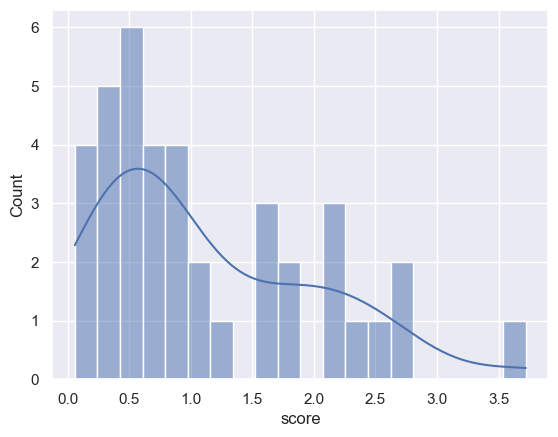

In [49]:
sns.set(style="darkgrid")
sns.histplot(data=model_ids, x=score, kde=True, bins=20)

NameError: name 'modelId' is not defined